#### PASCAL VOC 2012 데이터 다운로드 받기

In [28]:
# pascal voc 2012 데이터를 다운로드 후 /content/data 디렉토리에 압축 해제
# DOWNLOAD시 약 3분정도 시간 소요. 아래 디렉토리가 잘 동작하지 않을 경우 https://web.archive.org/web/20140815141459/http://pascallin.ecs.soton.ac.uk/challenges/VOC/voc2012/VOCtrainval_11-May-2012.tar
!mkdir ./data

# 해당 사이트의 데이터 다운로드-샘플 데이터로 감
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

# 해당 위치 디렉토리에 압축파일을 품
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/JPEGImages/2008_007264.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007265.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007266.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007269.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007273.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007274.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007277.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007279.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007280.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007281.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007282.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007285.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007286.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007287.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007289.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007291.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007293.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007295.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007298.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007305.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007307.jpg
VOCdevkit/VOC2012/J

In [29]:
!ls /content/data/VOCdevkit/VOC2012
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations  ImageSets	JPEGImages
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


#### Annotations 디렉토리에 있는 임의의 annotation 파일 보기

In [3]:
!cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

#### Annotation xml 파일에 있는 요소들을 파싱하여 접근하기
* ElementTree를 이용하여 XML 파싱(lxml 패키지는 이미 코랩에 설치됨. pip install lxml)

In [30]:
import os
import random

# 코랩 버전 절대경로 수정. 
VOC_ROOT_DIR ="/content/data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

# 해당 xml파일들은 각 이미지에 대한 어노테이션 파일임
xml_files = os.listdir(ANNO_DIR)                       
print(xml_files[:5]); print(len(xml_files))

['2012_001424.xml', '2008_005680.xml', '2011_003229.xml', '2010_002899.xml', '2011_003886.xml']
17125


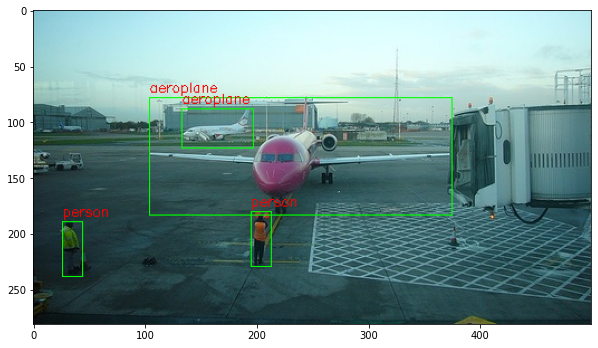

In [34]:
#Annotation내의 Object들의 bounding box 정보를 이용하여 Bounding box 시각화
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

xml_file=os.path.join(ANNO_DIR, '2007_000032.xml')

# 해당 주소의 xml 파일을 파싱
tree=ET.parse(xml_file)

# 파싱한 elemente 노드 중 루트는 annotation
root=tree.getroot()

# 루트의 특정 element의 노드 사이의 글자를 가져옴
image_name=root.find('filename').text
full_image_name=os.path.join(IMAGE_DIR,image_name)
img=cv2.imread(full_image_name)

# BGR 형식 색 조합
green_color=(0,255,0)
red_color=(0,0,255)
# 이미지 사이즈 등의 정보를 가져옴
image_size=root.find('size')
image_width=int(image_size.find('width').text)
image_height=int(image_size.find('height').text)

object_list=[]
# xml 파일에 매핑되는 오브젝트 정보들을 가져와서 이름과 바운딩 박스의 정보들을 이미지에 그려냄
for object in root.findall('object'):
  xml_box=object.find('bndbox')

  left=int(xml_box.find('xmin').text)
  top=int(xml_box.find('ymin').text)
  right=int(xml_box.find('xmax').text)
  bottom=int(xml_box.find('ymax').text)

  class_name=object.find('name').text

  cv2.rectangle(img, (left, top), (right,bottom), color=green_color, thickness=1)
  cv2.putText(img, class_name, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
